In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Generating Dataset

In [3]:
X, y = make_classification(
                            n_samples = 1000,
                            n_features = 2,
                            n_classes = 2,
                            n_clusters_per_class = 2,
                            n_redundant = 0,
                            random_state = 34
                        )

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

### Visualizing the dataset

[]

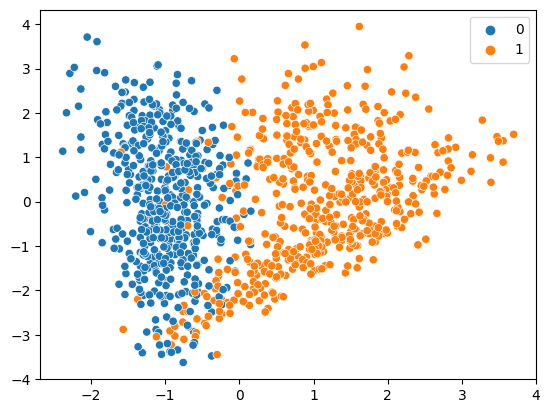

In [5]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.plot()

### Splitting the dataset in train and test datasets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 47)

In [7]:
X_train.shape, y_train.shape

((700, 2), (700,))

In [8]:
X_test.shape, y_test.shape

((300, 2), (300,))

### Model Training

In [10]:
svc = SVC(kernel = 'linear')

In [11]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
svc.coef_

array([[ 2.87500869, -0.32211788]])

### Prediction

In [13]:
y_pred_test = svc.predict(X_test)

### Confusion Matrix, Accuraccy Score, Classification Report

In [14]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[147  10]
 [ 13 130]]


In [15]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_test))

Accuracy Score:  0.9233333333333333


In [16]:
print("------------------Classification Report------------------\n", classification_report(y_test, y_pred_test))

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       157
           1       0.93      0.91      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Hyperparameter Tuning

In [23]:
parameters = {
    'C' : [0.01, 0.1, 1, 10, 100, 1000],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto', 1, 0.1, 0.001, 0.0001]
}

In [24]:
classifier = SVC()
grid_search_cv_clf = GridSearchCV(classifier, param_grid = parameters, refit = True, cv = 5, verbose = 3)

In [25]:
grid_search_cv_clf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END C=0.01, gamma=scale, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END C=0.01, gamma=scale, kernel=linear;, score=0.964 total time=   0.0s
[CV 3/5] END C=0.01, gamma=scale, kernel=linear;, score=0.950 total time=   0.0s
[CV 4/5] END C=0.01, gamma=scale, kernel=linear;, score=0.936 total time=   0.0s
[CV 5/5] END C=0.01, gamma=scale, kernel=linear;, score=0.886 total time=   0.0s
[CV 1/5] END ..C=0.01, gamma=scale, kernel=poly;, score=0.907 total time=   0.0s
[CV 2/5] END ..C=0.01, gamma=scale, kernel=poly;, score=0.936 total time=   0.0s
[CV 3/5] END ..C=0.01, gamma=scale, kernel=poly;, score=0.950 total time=   0.0s
[CV 4/5] END ..C=0.01, gamma=scale, kernel=poly;, score=0.914 total time=   0.0s
[CV 5/5] END ..C=0.01, gamma=scale, kernel=poly;, score=0.864 total time=   0.0s
[CV 1/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=scale, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [26]:
grid_search_cv_clf.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [27]:
y_pred_test = grid_search_cv_clf.predict(X_test)

### Confusion Matrix, Accuraccy Score, Classification Report

In [28]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[150   7]
 [ 11 132]]


In [29]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_test))

Accuracy Score:  0.94


In [30]:
print("------------------Classification Report------------------\n", classification_report(y_test, y_pred_test))

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       157
           1       0.95      0.92      0.94       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

